In [1]:
import os
import sys

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
from gammapy.datasets import Datasets
from gammapy.modeling import Fit
from gammapy.modeling.models import (
    Models, 
    SkyModel, 
    PowerLawSpectralModel,
    LogParabolaSpectralModel,
)
from gammapy.utils.check import check_tutorials_setup
from gammapy.visualization.utils import plot_contour_line

In [4]:
from astropy import units as u
from astropy.table import Table

In [5]:
import my_modules.config.cfg as cfg
import my_modules.plot_style.plotter as plotter
import my_modules.utilities.utilities as utl
from my_modules.spectral_models import SkyModelFactory
import my_modules.gammapy_catalogs.gammapy_catalogs as gammapy_cat

In [6]:
from settings import Settings

In [7]:
settings = Settings()

## Define o caminho onde estão os dados dos catálogos gammapy

OBS: é necessário fazer o download dos catálogos usando 

    gammapy download datasets

In [8]:
%env GAMMAPY_DATA=./gammapy-data/1.1

env: GAMMAPY_DATA=./gammapy-data/1.1


# Configuration

In [9]:
path_my_plot_style = f"{settings.PLOT_STYLES_PATH}/{settings.PLOT_STYLES_FILE}" 
plt.style.use(path_my_plot_style)

In [10]:
check_tutorials_setup()


System:

	python_executable      : /home/livia/anaconda3/envs/gammapy-1.1/bin/python 
	python_version         : 3.9.18     
	machine                : x86_64     
	system                 : Linux      


Gammapy package:

	version                : 1.1        
	path                   : /home/livia/anaconda3/envs/gammapy-1.1/lib/python3.9/site-packages/gammapy 


Other packages:

	numpy                  : 1.24.4     
	scipy                  : 1.10.1     
	astropy                : 5.3.3      
	regions                : 0.7        
	click                  : 8.1.3      
	yaml                   : 6.0.1      
	IPython                : 8.7.0      
	jupyterlab             : 3.5.3      
	matplotlib             : 3.7.3      
	pandas                 : 1.5.2      
	healpy                 : 1.16.5     
	iminuit                : 2.21.3     
	sherpa                 : 4.15.1     
	naima                  : 0.10.0     
	emcee                  : 3.1.3      
	corner                 : 2.2.1      
	ray        

<a id='intro'></a>
🔝 [Back to Top](#indice)<br>
## 1. Introduction 
A Python code to search for possible γ-ray counterparts to the target source and to perform the spectral model fitting. This code selects the sources (in the Gammapy source catalogs) within the region of interest (centered in the position of the target source) and finds the best fit for the given spectrum model. 

## Counterparts Analysis

In [11]:
filename = "SpiderSystems.csv"

In [12]:
spider_systems = utl.read_systems_file(filename)

In [13]:
len(spider_systems)

92

In [14]:
system_data = spider_systems[91]

In [15]:
system_data

SpiderSystem(source_name='J2339-0533', pos_ra=354.91, pos_dec=-5.55)

In [16]:
source_info = utl.set_source_info(system_data)

In [17]:
region_of_interest = utl.create_region_of_interest(
    source_info=source_info, 
    radius_roi=0.5, 
    e_ref_min= None, 
    e_ref_max=None,
)
region_of_interest

{'name': 'J2339-0533',
 'position': <SkyCoord (ICRS): (ra, dec) in deg
     (354.91, -5.55)>,
 'radius_roi': <Quantity 0.5 deg>,
 'e_ref_min': None,
 'e_ref_max': None,
 'roi_name': 'J2339-0533_roi_0dot5deg'}

In [18]:
sources_gammapy, datasets_gammapy, models_gammapy = gammapy_cat.get_datasets_flux_points_gammapy(region_of_interest)

/home/livia/anaconda3/envs/gammapy-1.1/lib/python3.9/site-packages/gammapy/catalog/fermi.py:445: UserWarning: Warning: converting a masked element to nan.
  "index_2": np.nan_to_num(float(self.data["Unc_PLEC_Exp_Index"])),
/home/livia/anaconda3/envs/gammapy-1.1/lib/python3.9/site-packages/gammapy/catalog/fermi.py:445: UserWarning: Warning: converting a masked element to nan.
  "index_2": np.nan_to_num(float(self.data["Unc_PLEC_Exp_Index"])),


---------------------------
'Total number of counterparts: 3'
'Total number of flux points tables: 3'


In [19]:
datasets_roi = datasets_gammapy.copy()

In [20]:
for datasets in datasets_roi:
    print(datasets)

FluxPointsDataset
-----------------

  Name                            : 3FGL J2339.6-0533 

  Number of total flux points     : 5 
  Number of fit bins              : 5 

  Fit statistic type              : chi2
  Fit statistic value (-2 log(L)) : 4.88

  Number of models                : 1 
  Number of parameters            : 4
  Number of free parameters       : 3

  Component 0: SkyModel
  
    Name                      : 3FGL_J2339dot6-0533_ecpl-3fgl
    Datasets names            : 3FGL J2339.6-0533
    Spectral model type       : ExpCutoffPowerLaw3FGLSpectralModel
    Spatial  model type       : 
    Temporal model type       : 
    Parameters:
      index                         :      1.508   +/-    0.08             
      amplitude                     :   4.91e-12   +/- 2.1e-13 1 / (MeV s cm2)
      reference             (frozen):    958.360       MeV         
      ecut                          :   5140.621   +/-  898.08 MeV         
  
  
FluxPointsDataset
-----------------


In [21]:
for model in models_gammapy:
    print(model)

SkyModel

  Name                      : 3FGL_J2339dot6-0533_ecpl-3fgl
  Datasets names            : 3FGL J2339.6-0533
  Spectral model type       : ExpCutoffPowerLaw3FGLSpectralModel
  Spatial  model type       : 
  Temporal model type       : 
  Parameters:
    index                         :      1.508   +/-    0.08             
    amplitude                     :   4.91e-12   +/- 2.1e-13 1 / (MeV s cm2)
    reference             (frozen):    958.360       MeV         
    ecut                          :   5140.621   +/-  898.08 MeV         


SkyModel

  Name                      : 4FGL_J2339dot6-0533_secpl-4fgl-dr3
  Datasets names            : 4FGL J2339.6-0533
  Spectral model type       : SuperExpCutoffPowerLaw4FGLDR3SpectralModel
  Spatial  model type       : 
  Temporal model type       : 
  Parameters:
    amplitude                     :   4.11e-12   +/- 1.0e-13 1 / (MeV s cm2)
    reference             (frozen):   1093.664       MeV         
    expfactor                    

In [22]:
for dataset in datasets_roi:
    print(dataset)

FluxPointsDataset
-----------------

  Name                            : 3FGL J2339.6-0533 

  Number of total flux points     : 5 
  Number of fit bins              : 5 

  Fit statistic type              : chi2
  Fit statistic value (-2 log(L)) : 4.88

  Number of models                : 1 
  Number of parameters            : 4
  Number of free parameters       : 3

  Component 0: SkyModel
  
    Name                      : 3FGL_J2339dot6-0533_ecpl-3fgl
    Datasets names            : 3FGL J2339.6-0533
    Spectral model type       : ExpCutoffPowerLaw3FGLSpectralModel
    Spatial  model type       : 
    Temporal model type       : 
    Parameters:
      index                         :      1.508   +/-    0.08             
      amplitude                     :   4.91e-12   +/- 2.1e-13 1 / (MeV s cm2)
      reference             (frozen):    958.360       MeV         
      ecut                          :   5140.621   +/-  898.08 MeV         
  
  
FluxPointsDataset
-----------------


In [23]:
datasets_name = "region_of_interest" 
utl.write_datasets_models(datasets_roi,region_of_interest, datasets_name)

In [24]:
datasets_read = utl.read_datasets_models(region_of_interest, "region_of_interest")

No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.


In [25]:
dict_leg_style = plotter.set_leg_style({}, datasets = datasets_roi, color = None, marker = None)

In [26]:
sed_type = cfg.sed_type_e2dnde
dict_plot_axis = dict(
    label =  (r'$\rm{E\ [TeV] }$', r'$\rm{E^2\ J(E)\ [TeV\ cm^{-2}\ s^{-1}] }$'),
    units =  (          'TeV',                       'TeV  cm-2     s-1')
)
dict_leg_place = dict(
    bbox_to_anchor = (0, -0.45), # Set legend outside plot
    ncol=3, 
    loc='lower left', 
)
dict_plot_limits = dict(
    energy_bounds = [1e-4, 3e1] * u.TeV,
    ylim = [1e-26, 1e-10]
)

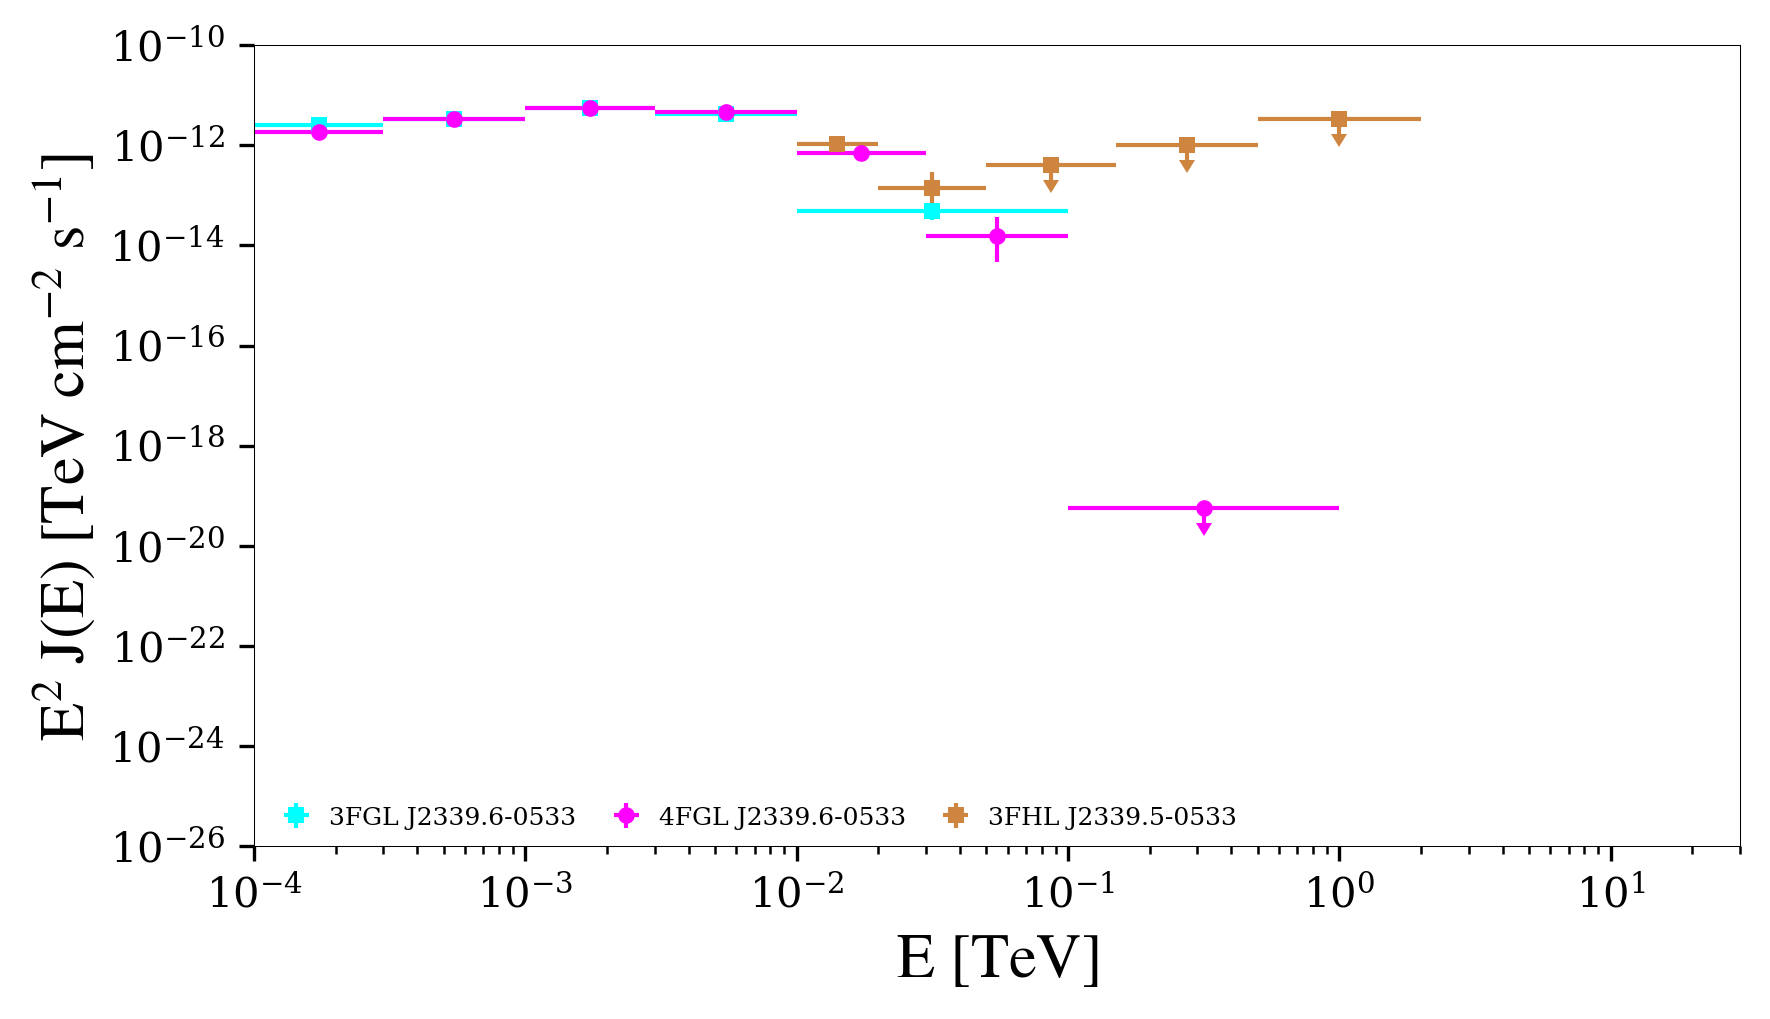

In [27]:
    plt = plotter.plot_SED(
            dict_plot_limits=dict_plot_limits,
            datasets=datasets_roi, 
            dict_leg_style=dict_leg_style, 
            region_of_interest=region_of_interest
          )

In [28]:
sky_model = SkyModelFactory().create(
    "ExpCutoffPowerLawSpectralModel",
    amplitude=2e-12 * u.Unit("TeV-1 cm-2 s-1"),
    index=2,
    lambda_=0.1 * u.Unit("TeV-1"),
    reference=1e-4 * u.Unit("TeV"),
    alpha=1.0,
)
fitted_sky_model, fit_result = utl.fit_datasets(datasets_roi, sky_model)

/home/livia/anaconda3/envs/gammapy-1.1/lib/python3.9/site-packages/astropy/units/quantity.py:666: RuntimeWarning: overflow encountered in power
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


In [29]:
print(fit_result.parameters.to_table())
print(fit_result.total_stat)

  type      name      value         unit      ... max frozen is_norm link
-------- --------- ----------- -------------- ... --- ------ ------- ----
spectral     index -3.3244e-01                ... nan  False   False     
spectral amplitude  3.7701e-06 TeV-1 s-1 cm-2 ... nan  False    True     
spectral reference  1.0000e-04            TeV ... nan   True   False     
spectral   lambda_  8.8704e+02          TeV-1 ... nan  False   False     
spectral     alpha  1.0000e+00                ... nan   True   False     
564.709336970482


ExpCutoffPowerLawSpectralModel

  type      name      value         unit      ... max frozen is_norm link
-------- --------- ----------- -------------- ... --- ------ ------- ----
spectral     index -3.3244e-01                ... nan  False   False     
spectral amplitude  3.7701e-06 TeV-1 s-1 cm-2 ... nan  False    True     
spectral reference  1.0000e-04            TeV ... nan   True   False     
spectral   lambda_  8.8704e+02          TeV-1 ... nan  False   False     
spectral     alpha  1.0000e+00                ... nan   True   False     


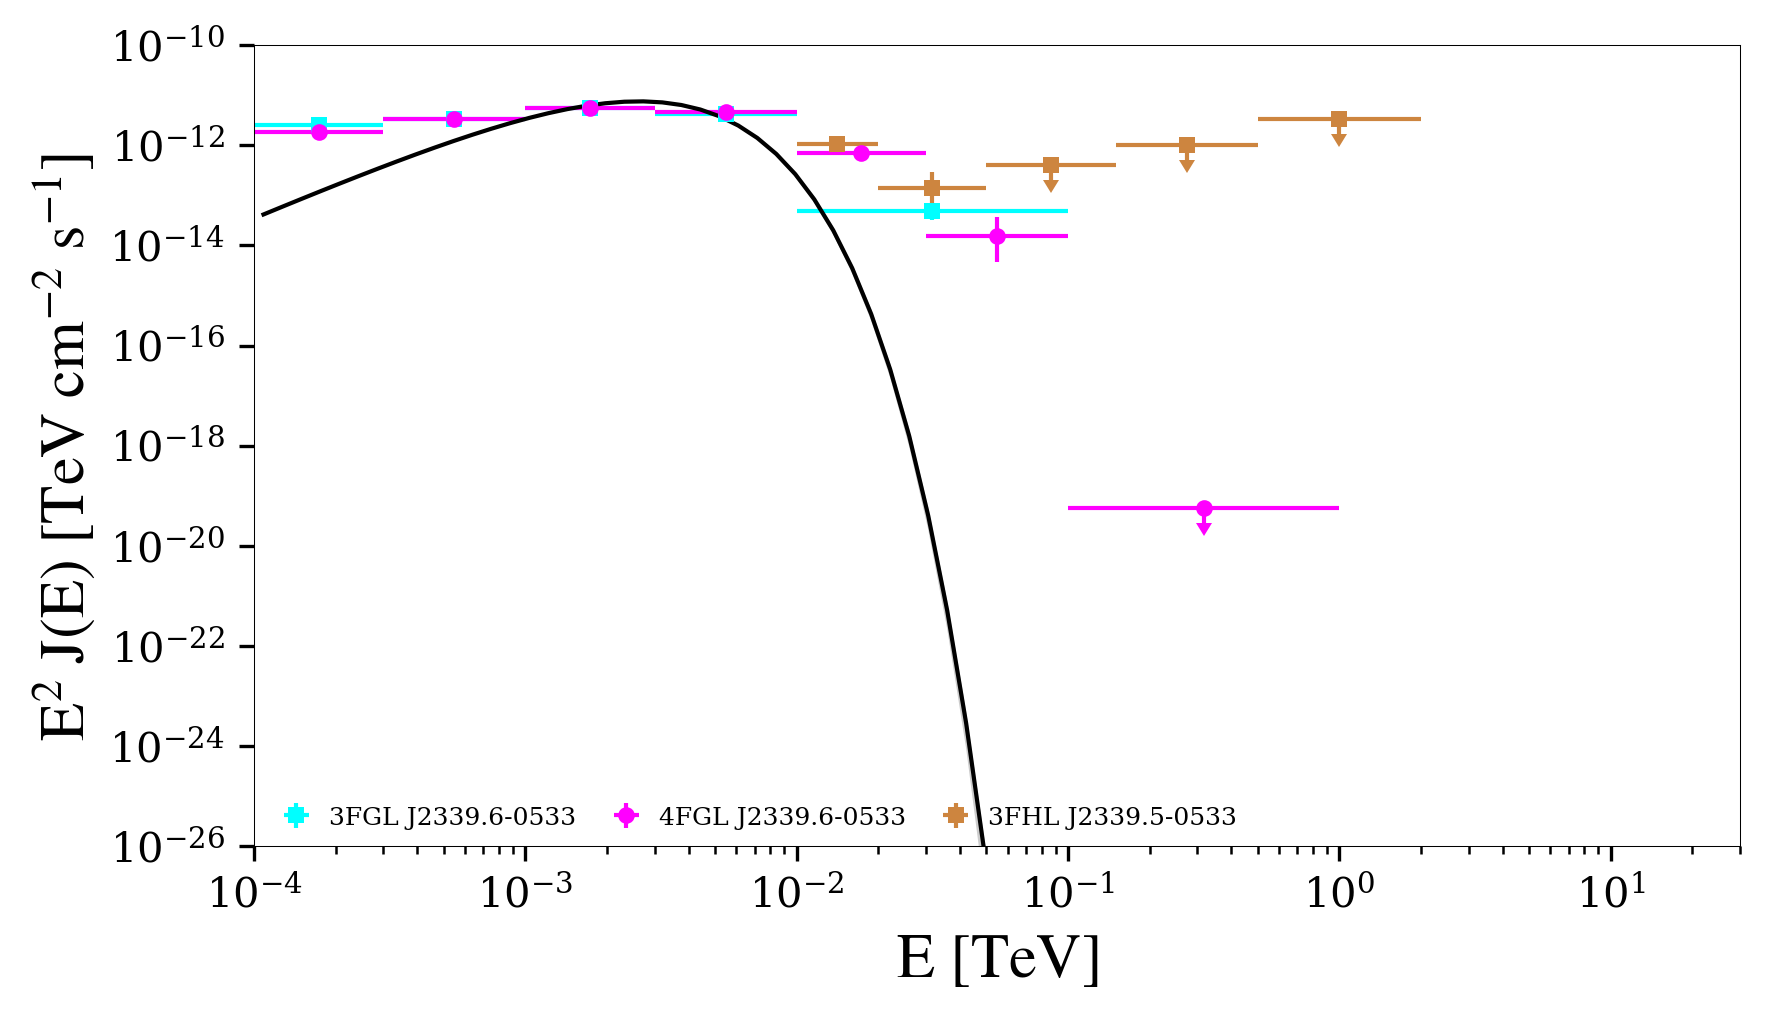

In [30]:
models=[fitted_sky_model]
#dict_leg_style = plotter.set_leg_style({}, models=models)
#dict_leg_style = plotter.set_leg_style(dict_leg_style, models=models)
#dict_plot_limits = dict(
energy_bounds = [1e-4, 3e1] * u.TeV
#    ylim = [1e-26, 1e-10]
#)
plt = plotter.plot_SED(
    datasets=datasets_roi,
    models=models,
    dict_plot_limits=dict_plot_limits,
    dict_leg_style=dict_leg_style,
    region_of_interest=region_of_interest, 
    )